In [24]:
import numpy as np
import os
import pandas as pd
from glob import glob
from os.path import basename

In [25]:
data_dir = "C:/Users/USER/Desktop/Gesture Data"

In [26]:
# List of files to read
files = [
    "Bhee\BheeBackward.csv", "Bhee\BheeDefault.csv", "Bhee\BheeDown.csv", "Bhee\BheeForward.csv",
    "Bhee\BheeLeft.csv", "Bhee\BheeRight.csv", "Bhee\BheeUp.csv",
    "Kaimod\KMBackward.csv", "Kaimod\KMDefault.csv", "Kaimod\KMDown.csv", "Kaimod\KMForward.csv",
    "Kaimod\KMLeft.csv", "Kaimod\KMRight.csv", "Kaimod\KMUp.csv",
    "Ohm\OhmBackward.csv", "Ohm\OhmDefault.csv", "Ohm\OhmDown.csv", "Ohm\OhmForward.csv",
    "Ohm\OhmLeft.csv", "Ohm\OhmRight.csv", "Ohm\OhmUp.csv", "Kaopoon1\KPBackward.csv", "Kaopoon1/KPDefault.csv",
    "Kaopoon1\KPDown.csv", "Kaopoon1\KPForward.csv", "Kaopoon1\KPLeft.csv", "Kaopoon1\KPRight.csv", "Kaopoon1\KPUp.csv",
    "Click\ClickBackward.csv", "Click\ClickDefault.csv", "Click\ClickDown.csv", "Click\ClickForward.csv", "Click\ClickLeft.csv", 
    "Click\ClickRight.csv", "Click\ClickUp.csv", "Click(Dyna)\Step\ClickBackwardDstep.csv", "Click(Dyna)\Step\ClickDownDstep.csv",
    "Click(Dyna)\Step\ClickForwardDstep.csv", "Click(Dyna)\Step\ClickLeftDstep.csv", "Click(Dyna)\Step\ClickRightDstep.csv",
    "Click(Dyna)\Step\ClickUpDstep.csv"
]

# Read all CSV files and concatenate into a single DataFrame
dfs = []
for file in files:
    file_path = os.path.join(data_dir, file)
    df = pd.read_csv(file_path)
    dfs.append(df)

data_df = pd.concat(dfs, ignore_index=True)

# Display the resulting DataFrame
data_df

,Time,imu0_ax,imu0_ay,imu0_az,imu1_ax,imu1_ay,imu1_az,imu2_ax,imu2_ay,imu2_az,imu3_ax,imu3_ay,imu3_az,Gesture
0,0,19.92,18.0,-18.45,17.38,0.23,-19.85,17.47,-1.82,-19.96,17.55,-0.57,-13.61,Backward
1,1,19.85,20.0,-16.91,14.76,0.23,-19.69,14.94,-2.83,-19.92,15.10,-0.88,-7.22,Backward
2,2,19.77,20.0,-15.36,12.14,0.23,-19.54,12.42,-3.83,-19.89,12.64,-1.19,-0.84,Backward
3,3,19.69,20.0,-13.81,9.52,0.23,-19.39,9.89,-4.84,-19.85,10.19,-1.49,5.55,Backward
4,4,19.62,20.0,-12.27,6.90,0.23,-19.23,7.36,-5.84,-19.81,7.74,-1.80,11.94,Backward
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745,115,20.00,-20.0,20.00,20.00,-20.00,20.00,20.00,-20.00,20.00,20.00,-20.00,20.00,Up
2746,116,20.00,-20.0,20.00,20.00,-20.00,20.00,20.00,-20.00,20.00,20.00,-20.00,20.00,Up
2747,117,20.00,-20.0,20.00,20.00,-20.00,20.00,20.00,-20.00,20.00,20.00,-20.00,20.00,Up
2748,118,20.00,-20.0,20.00,20.00,-20.00,20.00,20.00,-20.00,20.00,20.00,-20.00,20.00,Up


In [27]:
X = data_df.drop(columns=['Gesture', 'Time'])
y = data_df['Gesture']

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Accuracy: 0.7109090909090909
Confusion Matrix:
[[ 39  21   0   4   1   1   0]
 [ 19 131   0   9   6   5   0]
 [  0   6  48   0   0   0   8]
 [ 14  12   0  38   0   0   0]
 [ 10   8   0   3  43   2   0]
 [ 12   5   0   0   2  32   0]
 [  0   3   8   0   0   0  60]]


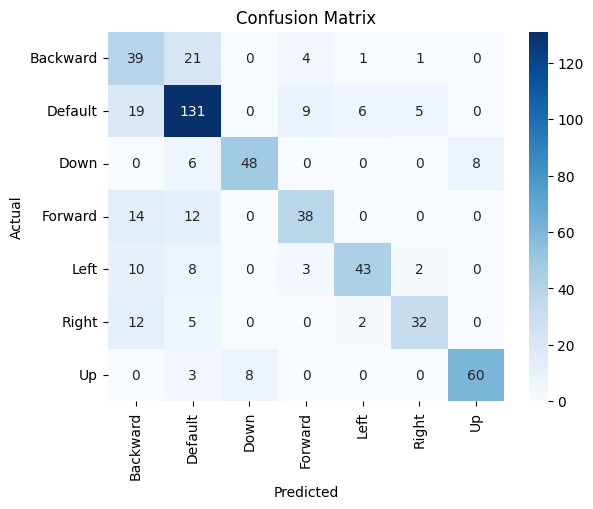

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique class labels
class_labels = sorted(set(y_test))

# Plot the confusion matrix with actual labels
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [31]:
from micromlgen import port

# Generate C code from the trained model
c_code = port(model, classmap={0: 'Backward', 1: 'Default', 2: 'Down', 3: 'Forward', 4: 'Left', 5: 'Right', 6: 'Up'})

# Print the generated C code
print(c_code)

#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class DecisionTree {
                public:
                    /**
                    * Predict class for features vector
                    */
                    int predict(float *x) {
                        if (x[8] <= 0.8100000023841858) {
                            if (x[4] <= 18.539999961853027) {
                                if (x[4] <= 13.115000247955322) {
                                    if (x[5] <= -14.269999980926514) {
                                        if (x[0] <= 13.71500015258789) {
                                            if (x[4] <= -19.164999961853027) {
                                                if (x[0] <= -11.044999957084656) {
                                                    if (x[8] <= -19.600000381469727) {
                                                        if (x[11] <= 8.744999885559082) {
                              